# The following notebook is to explore the dataset, we will begin with visualizing the lables and sentiments and then go on to build pipelines for cleaning the data. Then build models using ML methods and then move on to transformers. 

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import janitor as jn
from wordcloud import WordCloud
from collections import Counter


In [3]:
raw_data = pd.read_csv('/Users/virajdatt/Desktop/github/public/Machine-Hack-/uHack-Sentiments/data/train.csv')

In [4]:
raw_data.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [6]:
# Following are the labels in the dataset
mlabels = ['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability']

In [57]:
raw_data.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


# Target variables Vizualization

## Let us first visualize the labels 
1. The First plot is to see the number of reviews under each Label
2. Then next we look at the count the number of reviews having multiple labels.

Code inspired by [Kartik Nooney](!https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

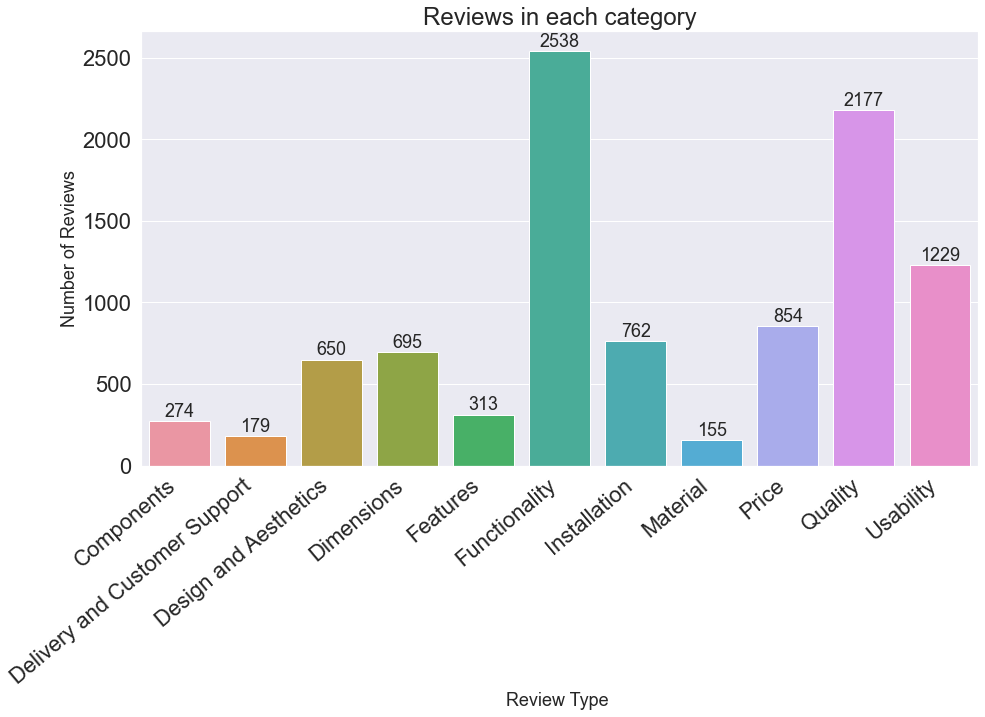

In [52]:
categories = list(raw_data[mlabels].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, raw_data[mlabels].sum().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Reviews in each category", fontsize=24)
plt.ylabel('Number of Reviews', fontsize=18)
plt.xlabel('Review Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = raw_data[mlabels].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

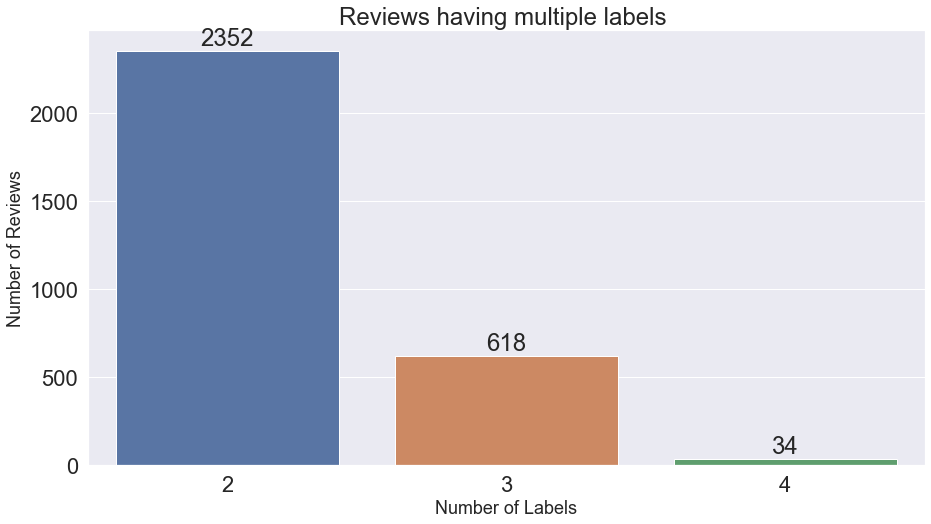

In [55]:
rowSums = raw_data[mlabels].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Reviews having multiple labels ")
plt.ylabel('Number of Reviews', fontsize=18)
plt.xlabel('Number of Labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

## Let us now visualize the count of the polarity of the reviews

In [65]:
raw_data['Polarity'].value_counts()

1    4770
0    1366
Name: Polarity, dtype: int64

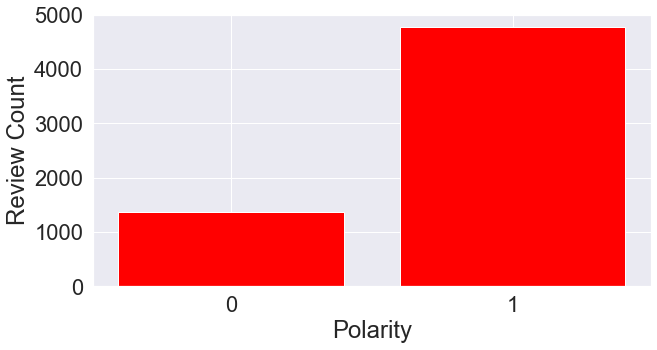

In [70]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['0','1'], [1366,4770], color='red')
plt.xlabel('Polarity')
plt.ylabel('Review Count')
plt.show()

# Text Data exploration

In [72]:
# Extract length of each review
raw_data['word_count'] = raw_data['Review'].apply(lambda x: len(str(x).split(" ")))

Following are descriptive stats about the lenght of reviews before any preprocessing

In [76]:
raw_data['word_count'].describe()

count    6136.000000
mean       30.257171
std        33.035399
min         2.000000
25%        10.000000
50%        19.000000
75%        38.000000
max       399.000000
Name: word_count, dtype: float64

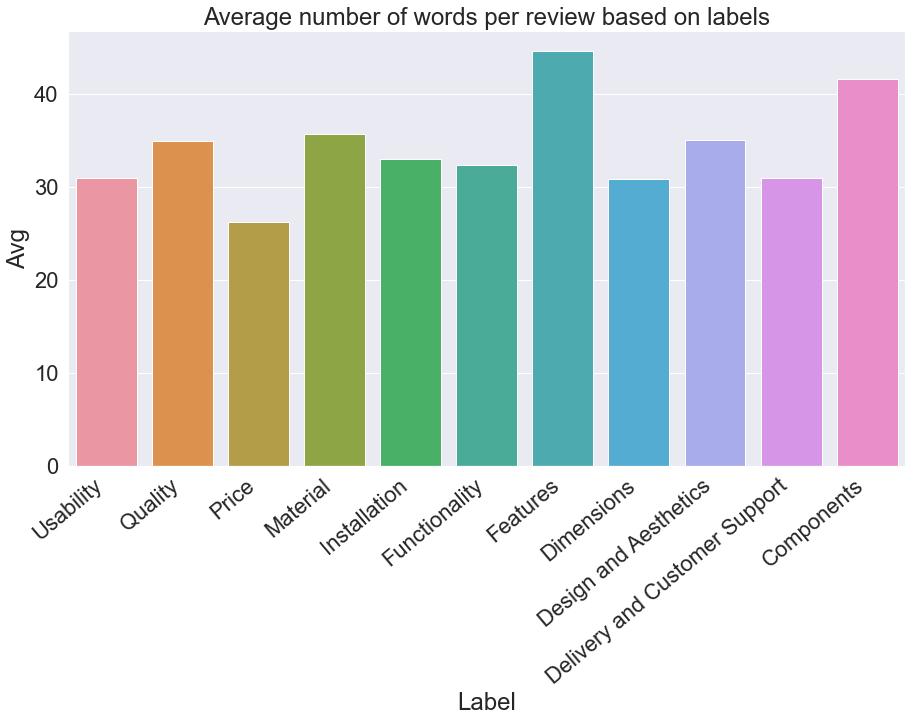

In [122]:
def label_wise_avg_size(df):
    lbl_avg = pd.DataFrame()
    for col in mlabels:
        avg_review_lenght = df[df[col]==1]["word_count"].mean()
        temp_df = pd.DataFrame([(col, avg_review_lenght)], columns=['Label', 'Avg'])
        lbl_avg = pd.concat([temp_df, lbl_avg])

    sns.set(font_scale = 2)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(lbl_avg['Label'], lbl_avg['Avg'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title('Average number of words per review based on labels')
    plt.show()
    #return lbl_avg
label_wise_avg_size(raw_data)

The MOST used WORDS:


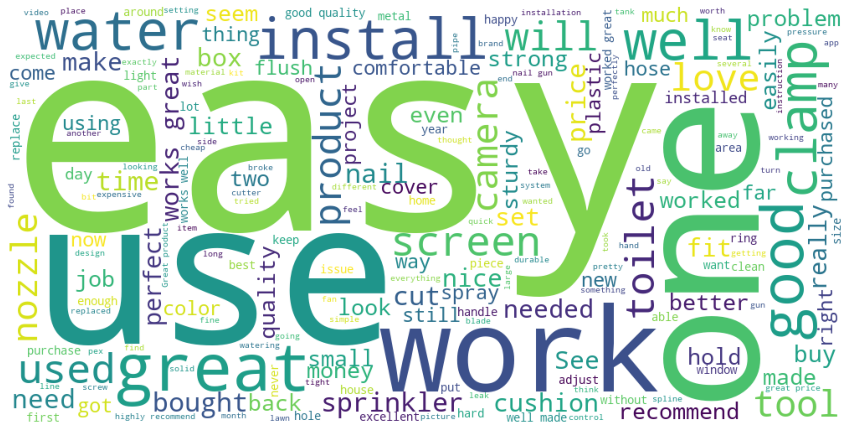

In [125]:
#Building the word cloud for MOST used WORDS
print("The MOST used WORDS:")
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(' '.join(raw_data['Review']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

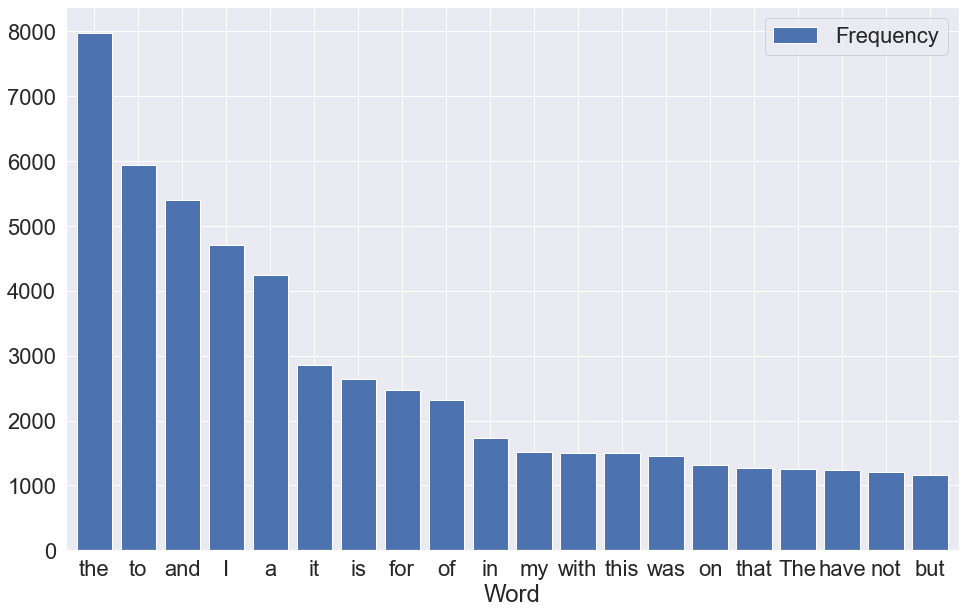

In [127]:
rslt = pd.DataFrame(Counter(" ".join(raw_data["Review"]).split()).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.show()

In [128]:
 #Extract captial letters from the tweets
raw_data['capitals'] = raw_data['Review'].str.extract(r'([A-Z]+(?:(?!\s?[A-Z][a-z])\s?[A-Z])+)')

In [130]:
# Looking at the results I am not sure if these will help the analysis since there are not a lot of capital letters in review
raw_data['capitals'].isnull().sum()

5669

In [135]:
# Display not null
raw_data[ raw_data['capitals'].notna() ]['capitals'] 
# Another way of doing the same thing 
# raw_data.dropna(subset=['capitals'])['capitals']


11         DI
55        BUT
66         XT
99        HOA
107       LED
        ...  
6095      ADA
6119    GREAT
6120      PEX
6121      PVC
6134      APP
Name: capitals, Length: 467, dtype: object

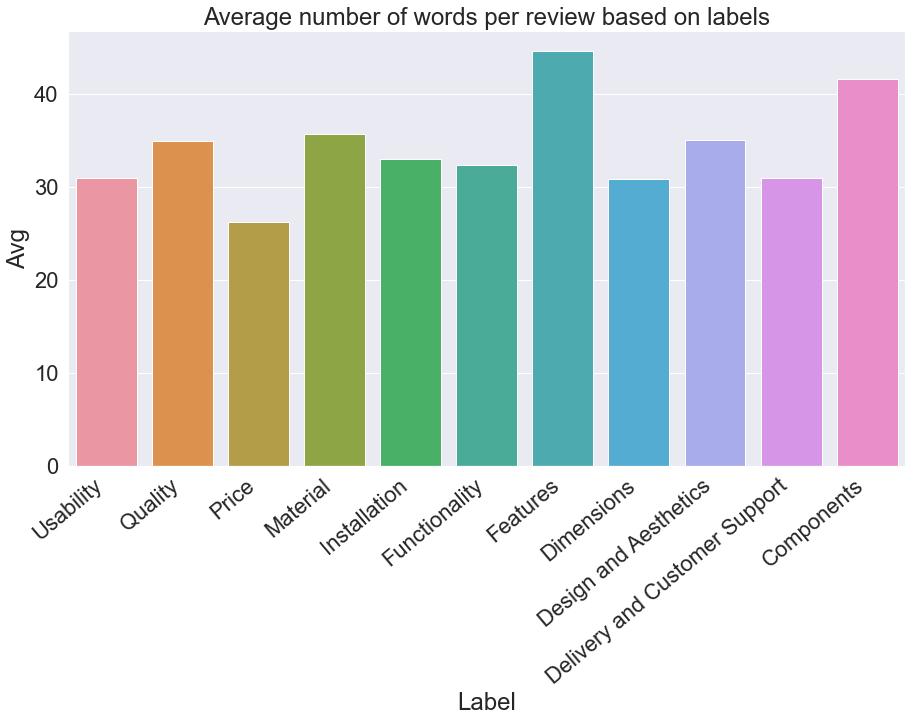

In [ ]:
def label_wise_avg_size(df):
    lbl_avg = pd.DataFrame()
    for col in mlabels:
        avg_review_lenght = df[df[col]==1]["word_count"].mean()
        temp_df = pd.DataFrame([(col, avg_review_lenght)], columns=['Label', 'Avg'])
        lbl_avg = pd.concat([temp_df, lbl_avg])

    sns.set(font_scale = 2)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(lbl_avg['Label'], lbl_avg['Avg'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title('Average number of words per review based on labels')
    plt.show()
    #return lbl_avg
label_wise_avg_size(raw_data)